# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [22]:
#Initialize empty lists for: Lat/Lng pairs, cities, countries, latitude, and longitude (the original pairs used to find the "nearest city"). Note this is NOT the actual lat/lng of the city, this is captured later from the OpenWeather API

lat_lngs = []
cities = []
countries=[]
orig_latitude=[]
orig_longitude=[]


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)

#Zip lat and lon for use by citypy call
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using citipy
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    #Check to ensure no duplicates
    if city not in cities:
        cities.append(city)
        countries.append(country)
        orig_latitude.append(lat_lng[0])
        orig_longitude.append(lat_lng[1])

#Zip city, country, lat, lon for use in Open Weather API call together for use in city
city_country_lat_lon = zip(cities, countries, orig_latitude, orig_longitude)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

Temperature (F) vs. Latitude

Humidity (%) vs. Latitude

Cloudiness (%) vs. Latitude

Wind Speed (mph) vs. Latitude



In [3]:
#Example of OpenWeather API call http://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=973d76a9421d572f47622e44bcca1876
#http://api.openweathermap.org/data/2.5/weather?q={city name},{state},{country code}&units=imperial&appid={your api key}


#Initialize lists to capture the stats for each city
city_ID=[]
city_temp=[]
city_humidity=[]
city_clouds_pct=[]
city_windspeed=[]

#These are the actual lat and lon for the city (not those used in find the nearest city in citipy)
city_latitude=[]
city_longitude=[]
cities = []
countries=[]

#These are the orig lat and lon used by citipy to find the nearest city. Captured just for comparison with the actual.
orig_latitude=[]
orig_longitude=[]

#Loop through all the cities captured by citipy
for city_loop, country_loop, lat_loop, lon_loop in city_country_lat_lon:
    city_name = city_loop
    country_name = country_loop
    #Set the URL using the city, country, api key
    url = 'http://api.openweathermap.org/data/2.5/weather?q='+city_name+',,'+country_name+'&units=imperial&appid='+weather_api_key
    
    #Capture the request from OpenWeather API
    res = requests.get(url)
    #Check to ensure the response is valid, if not go to the next item in the for loop
    if res.status_code != 200:
        #Print a progress indicator to the screen    
        print(city_name+' not found at OpenWeather API!')
        continue
    #Capture the valid response in json
    response = res.json()
    #Print a progress indicator to the screen
    print(str(response['id'])+": "+city_name+' found and added!')
    
    #Append values to all the various lists to capture the city data
    city_ID.append(response['id'])
    cities.append(city_name)
    countries.append(country_name)
    orig_latitude.append(lat_loop)
    orig_longitude.append(lon_loop)
    city_temp.append(response['main']['temp'])
    city_humidity.append(response['main']['humidity'])
    city_clouds_pct.append(response['clouds']['all'])
    city_windspeed.append(response['wind']['speed'])
    city_latitude.append(response['coord']['lat'])
    city_longitude.append(response['coord']['lon'])

#Print an indicator that the Open Weather API and data capture process has finished
print('')
print('FINISHED PROCESSING WEATHER APIs')

3369157: cape town found and added!
illoqqortoormiut not found at OpenWeather API!
2074865: carnarvon found and added!
6201424: mataura found and added!
4018904: alamos found and added!
2413753: brufut found and added!
648900: lappeenranta found and added!
3424607: tasiilaq found and added!
2075720: broome found and added!
2775516: horn found and added!
5880054: barrow found and added!
1154689: ko samui found and added!
108410: riyadh found and added!
3414079: olafsvik found and added!
2015306: tiksi found and added!
654899: kajaani found and added!
4030556: rikitea found and added!
3874787: punta arenas found and added!
4032243: vaini found and added!
4034496: fare found and added!
4035715: avarua found and added!
3366880: hermanus found and added!
4020109: atuona found and added!
3372707: ribeira grande found and added!
2194098: ahipara found and added!
3421765: nanortalik found and added!
chagda not found at OpenWeather API!
2075265: busselton found and added!
5233053: yankton found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Build the dataframe of all the city records and data

city_data = pd.DataFrame(columns=['City ID', 'City', 'Country', 'Orig Lat', 'Orig Lon', 'Act Lat', 'Act Lon', 'Temperature (F)', 'Humidity', 'Cloudiness', 'Wind Speed'])

city_data['City ID'] = city_ID
city_data['City'] = cities
city_data['Country'] = countries
city_data['Orig Lat'] = orig_latitude
city_data['Orig Lon'] = orig_longitude
city_data['Act Lat'] = city_latitude
city_data['Act Lon'] = city_longitude
city_data['Temperature (F)'] = city_temp
city_data['Humidity'] = city_humidity
city_data['Cloudiness'] = city_clouds_pct
city_data['Wind Speed'] = city_windspeed

city_data.set_index('City ID', inplace=True)
#Print the dataframe to screen and csv file
print('The total number of cities added is '+str(len(city_data)))
city_data.to_csv('test_city_data')
city_data.head()

The total number of cities added is 38


,City,Country,Orig Lat,Orig Lon,Act Lat,Act Lon,Temperature (F),Humidity,Cloudiness,Wind Speed
City ID,,,,,,,,,,
3369157,cape town,za,-84.879274,-13.228447,-33.93,18.42,59.99,55,39,14.99
2074865,carnarvon,au,-24.198548,101.846951,-24.87,113.63,75.20,88,48,10.29
6201424,mataura,pf,-82.355562,-161.815989,-46.19,168.86,45.00,89,12,4.00
4018904,alamos,mx,28.061275,-108.758563,27.02,-108.93,75.00,67,42,1.99
2413753,brufut,gm,13.706027,-17.373057,13.38,-16.75,102.20,24,0,10.29


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
crazy_humid_cities = city_data.loc[city_data['Humidity']>100]
crazy_humid_cities.head()

,City,Country,Orig Lat,Orig Lon,Act Lat,Act Lon,Temperature (F),Humidity,Cloudiness,Wind Speed
City ID,,,,,,,,,,


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data.loc[city_data['Humidity']<=100]


In [7]:
#Delete the Orig Lat and Orig Lon as these are not the actual lat and lon of the city. Delete Act Lon since plotting is on Act Lat. Keep the city, country, and ID fields.
del clean_city_data['Orig Lat']
del clean_city_data['Orig Lon']
del clean_city_data['Act Lon']

# Export the City_Data and Clean_city_data into csv's
city_data.to_csv('city_data')
city_data.to_csv('clean_city_data')
clean_city_data.head()

clean_city_count = clean_city_data['City'].count()
clean_city_count

38

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

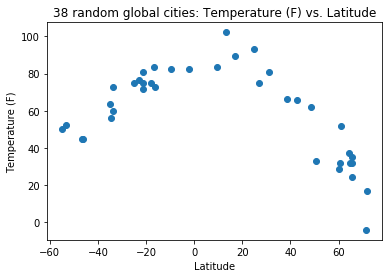

In [8]:
plt.scatter(clean_city_data['Act Lat'], clean_city_data['Temperature (F)'])
plt.title(f'{clean_city_count} random global cities: Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

plt.show()

## Latitude vs. Humidity Plot

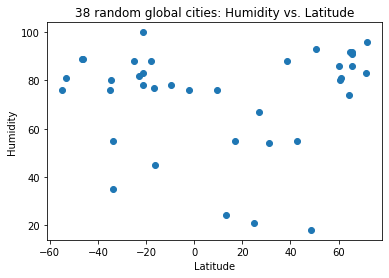

In [9]:
plt.scatter(clean_city_data['Act Lat'], clean_city_data['Humidity'])
plt.title(f'{clean_city_count} random global cities: Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

## Latitude vs. Cloudiness Plot

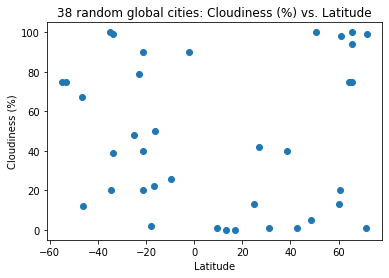

In [10]:
plt.scatter(clean_city_data['Act Lat'], clean_city_data['Cloudiness'])
plt.title(f'{clean_city_count} random global cities: Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.show()

## Latitude vs. Wind Speed Plot

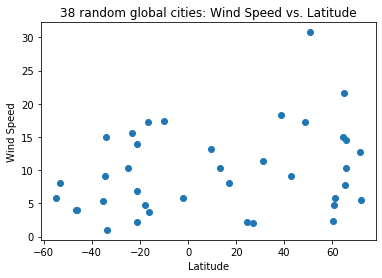

In [11]:
plt.scatter(clean_city_data['Act Lat'], clean_city_data['Wind Speed'])
plt.title(f'{clean_city_count} random global cities: Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

def get_line(x,y,x_name,y_name):
    
    city_count = x.count()
    ax1 = plt.scatter(x,y)
    ax1 = plt.title(f'{city_count} Random cities: {x_name} vs. {y_name}')
    ax1 = plt.xlabel(x_name)
    ax1 = plt.ylabel(y_name)

    slope, intercept, rvalue, pvalue, stderr = st.linregress(x,y)
    r_squared = rvalue**2
    ax2 = plt.plot(x, x*slope+intercept, color='red', label= 'Y= '+str(round(slope,2))+'*X + '+str(round(intercept,2))+' R2='+str(round(r_squared,2)))

    return ax1, ax2

In [13]:
# Create Northern and Southern Hemisphere DataFrames

north_city_data = clean_city_data.loc[clean_city_data['Act Lat']>=0]
south_city_data = clean_city_data.loc[clean_city_data['Act Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

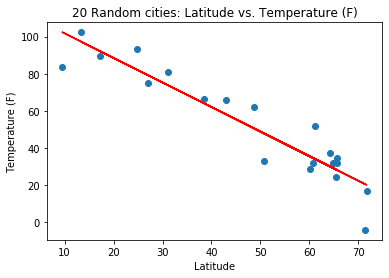

In [14]:
#Pass x axis data, y axis data, x axis label, and y axis label to "get line" function which returns scatter plot with regression line
get_line(north_city_data['Act Lat'], north_city_data['Temperature (F)'], 'Latitude', 'Temperature (F)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

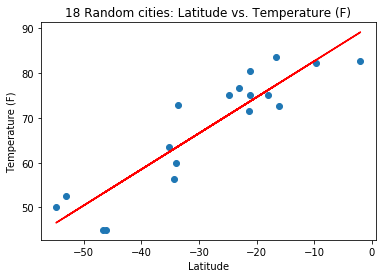

In [15]:
#Pass x axis data, y axis data, x axis label, and y axis label to "get line" function which returns scatter plot with regression line
get_line(south_city_data['Act Lat'], south_city_data['Temperature (F)'], 'Latitude', 'Temperature (F)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

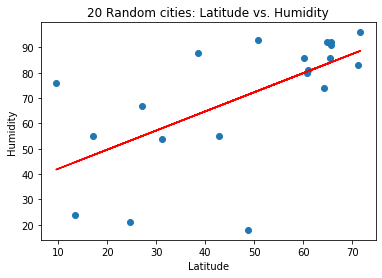

In [16]:
#Pass x axis data, y axis data, x axis label, and y axis label to "get line" function which returns scatter plot with regression line
get_line(north_city_data['Act Lat'], north_city_data['Humidity'], 'Latitude', 'Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

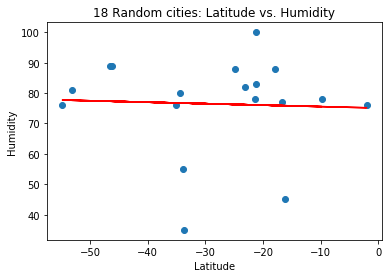

In [17]:
get_line(south_city_data['Act Lat'], south_city_data['Humidity'], 'Latitude', 'Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

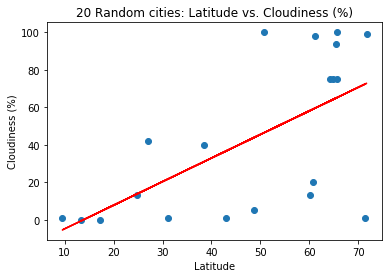

In [18]:
get_line(north_city_data['Act Lat'], north_city_data['Cloudiness'], 'Latitude', 'Cloudiness (%)')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

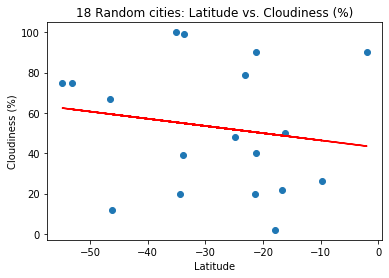

In [19]:
get_line(south_city_data['Act Lat'], south_city_data['Cloudiness'], 'Latitude', 'Cloudiness (%)')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

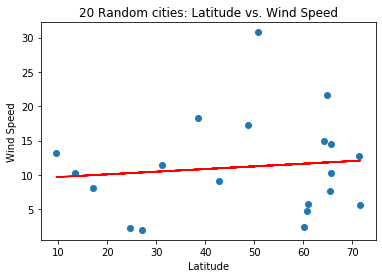

In [20]:
get_line(north_city_data['Act Lat'], north_city_data['Wind Speed'], 'Latitude', 'Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

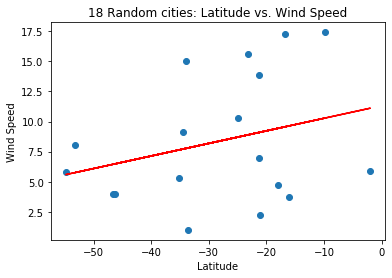

In [21]:
get_line(south_city_data['Act Lat'], south_city_data['Wind Speed'], 'Latitude', 'Wind Speed')
plt.show()